In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [57]:
data = pd.read_csv('data/police.csv')
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


<Axes: >

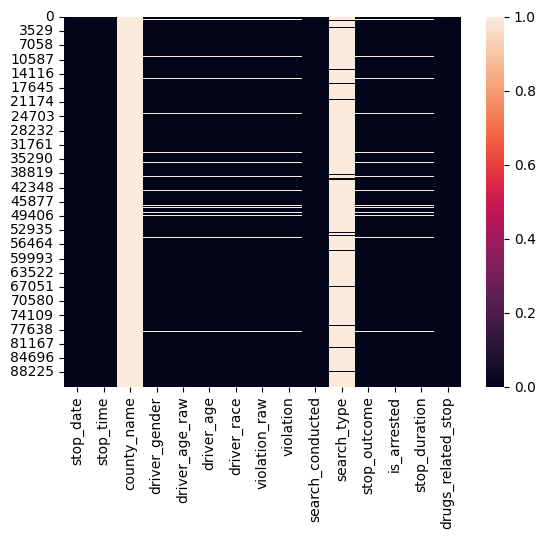

In [58]:
sns.heatmap(data.isnull())

In [59]:
data_to_drop = data[['county_name', 'search_type']]
data = data.drop(data_to_drop, axis=1)
data = data.dropna()
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


<Axes: >

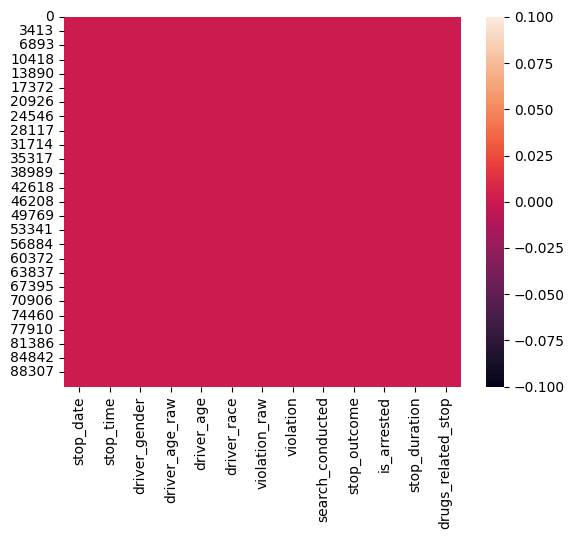

In [60]:
sns.heatmap(data.isnull())

Grouping

In [71]:
#Group by Gender adn drugs related stops
gender_data = data.groupby('driver_gender')['drugs_related_stop'].agg(
    total_stops='count',
    drug_related_stops='sum',
    percentage='mean'
).round(3)
gender_data

,total_stops,drug_related_stops,percentage
driver_gender,,,
F,23464,96,0.004
M,62649,718,0.011


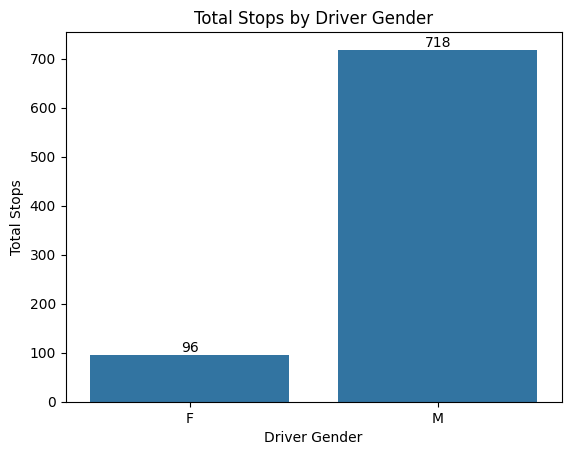

In [72]:
ax = sns.barplot(data=gender_data, x='driver_gender', y='drug_related_stops', estimator='sum', errorbar=None)
ax.bar_label(ax.containers[0], fontsize = 10)
plt.xlabel('Driver Gender')
plt.ylabel('Total Stops')
plt.title('Total Stops by Driver Gender')
plt.show()